In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder

url = 'https://raw.githubusercontent.com/slashgohu/Challenge-TelecomX-2/refs/heads/main/df_limpo.csv'
df = pd.read_csv(url)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

**Removendo colunas irrelevantes:**

In [37]:
df.drop('customerID', axis=1, inplace=True)

In [38]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


**Encoding:**

In [39]:
df_limpo = df.copy()


colunas_internet = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in colunas_internet:
    df_limpo[col] = df_limpo[col].replace('No internet service', 'No')

colunas_categoricas = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_limpo, columns=colunas_categoricas, drop_first=True)

df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [40]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [41]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [42]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


**Verificação da Proporção de Evasão:**

Contagem de clientes por categoria:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporção de clientes com Churn:
  - Cancelaram (Churn = 'Yes'): 26.58%
  - Permaneceram (Churn = 'No'): 73.42%


/tmp/ipython-input-2678359249.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_proportion = churn_counts[1] / total_clientes
/tmp/ipython-input-2678359249.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_churn_proportion = churn_counts[0] / total_clientes


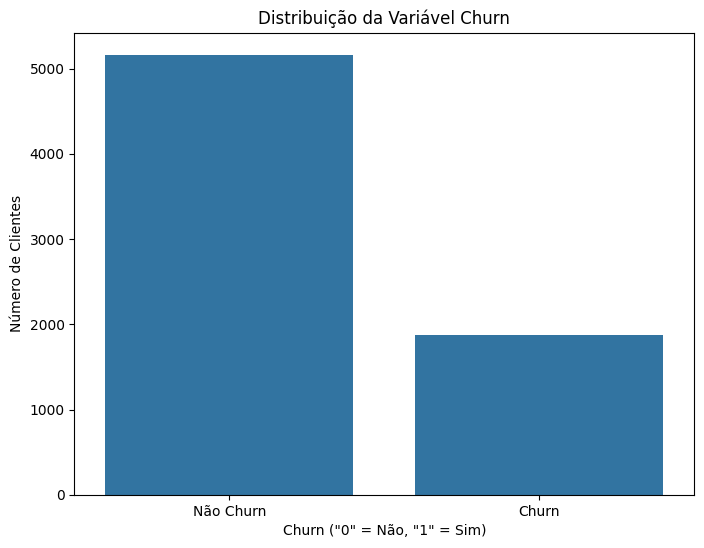

In [43]:
churn_counts = df_encoded['Churn_Yes'].value_counts()

print("Contagem de clientes por categoria:")
print(churn_counts)

total_clientes = len(df_encoded)
churn_proportion = churn_counts[1] / total_clientes
no_churn_proportion = churn_counts[0] / total_clientes

print("\nProporção de clientes com Churn:")
print(f"  - Cancelaram (Churn = 'Yes'): {churn_proportion:.2%}")
print(f"  - Permaneceram (Churn = 'No'): {no_churn_proportion:.2%}")

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn_Yes', data=df_encoded)
plt.title('Distribuição da Variável Churn')
plt.xlabel('Churn ("0" = Não, "1" = Sim)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

df_encoded.head()

/tmp/ipython-input-156475107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0.112676,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


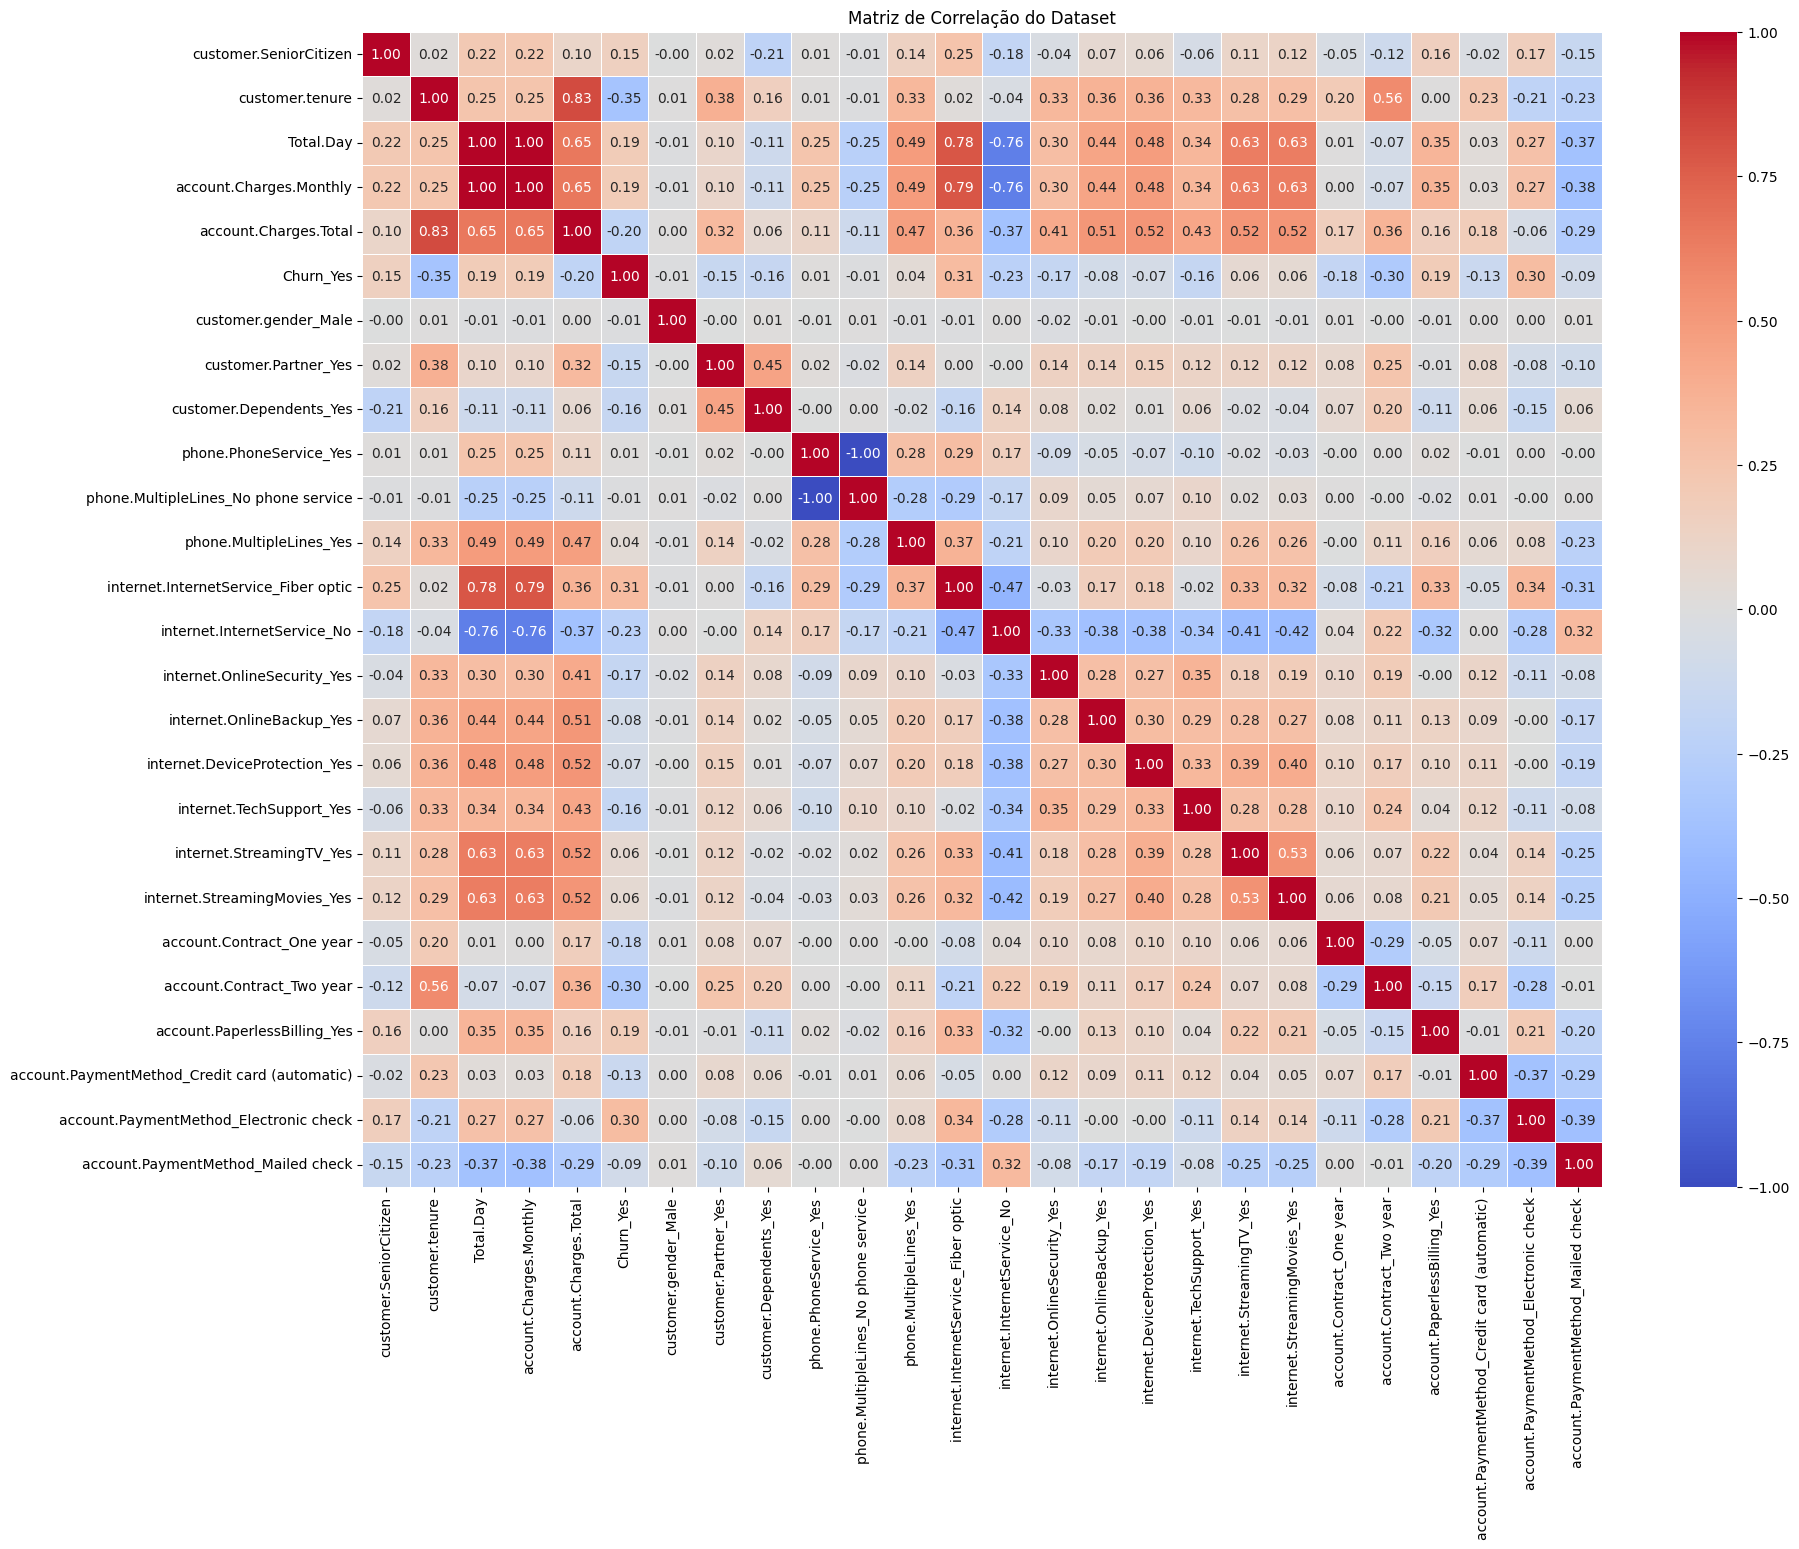

Correlação das features com Churn_Yes:
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.307463
account.PaymentMethod_Electronic check           0.301455
account.Charges.Monthly                          0.192858
Total.Day                                        0.192030
account.PaperlessBilling_Yes                     0.191454
customer.SeniorCitizen                           0.150541
internet.StreamingTV_Yes                         0.063254
internet.StreamingMovies_Yes                     0.060860
phone.MultipleLines_Yes                          0.040033
phone.PhoneService_Yes                           0.011691
customer.gender_Male                            -0.008545
phone.MultipleLines_No phone service            -0.011691
internet.DeviceProtection_Yes                   -0.066193
internet.OnlineBackup_Yes                       -0.082307
account.PaymentMethod_Mailed check              -0.090773
account.PaymentMethod_Credit card

In [45]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlação do Dataset')
plt.show()

print("Correlação das features com Churn_Yes:")
print(corr_matrix['Churn_Yes'].sort_values(ascending=False))

**Análises Direcionadas**

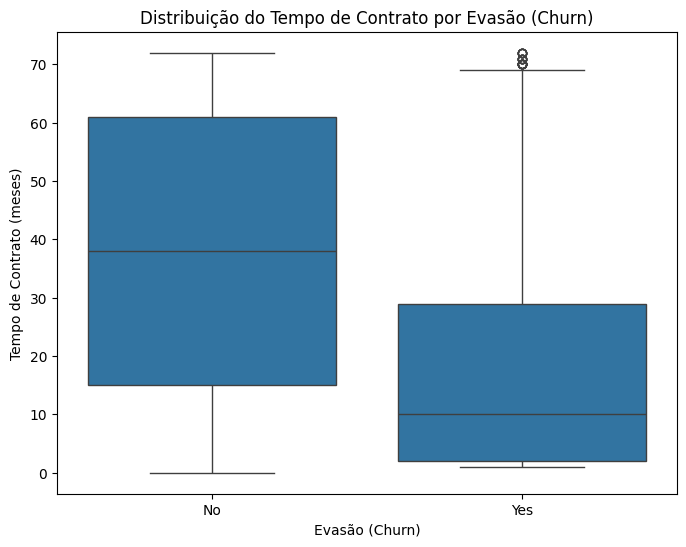

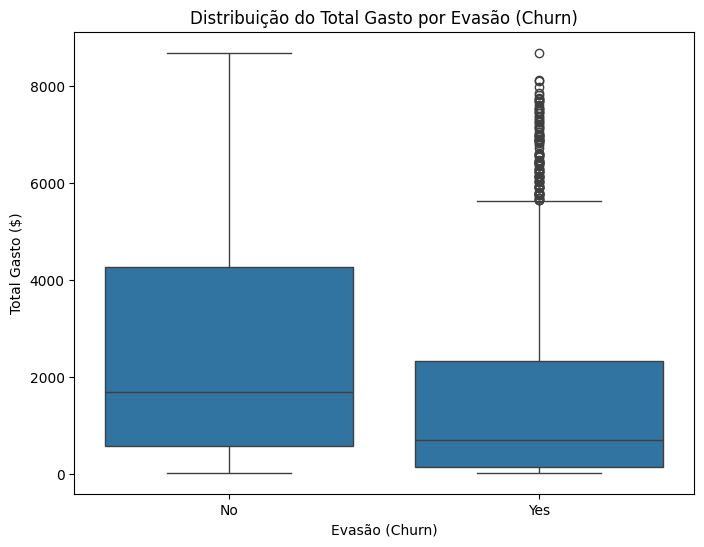

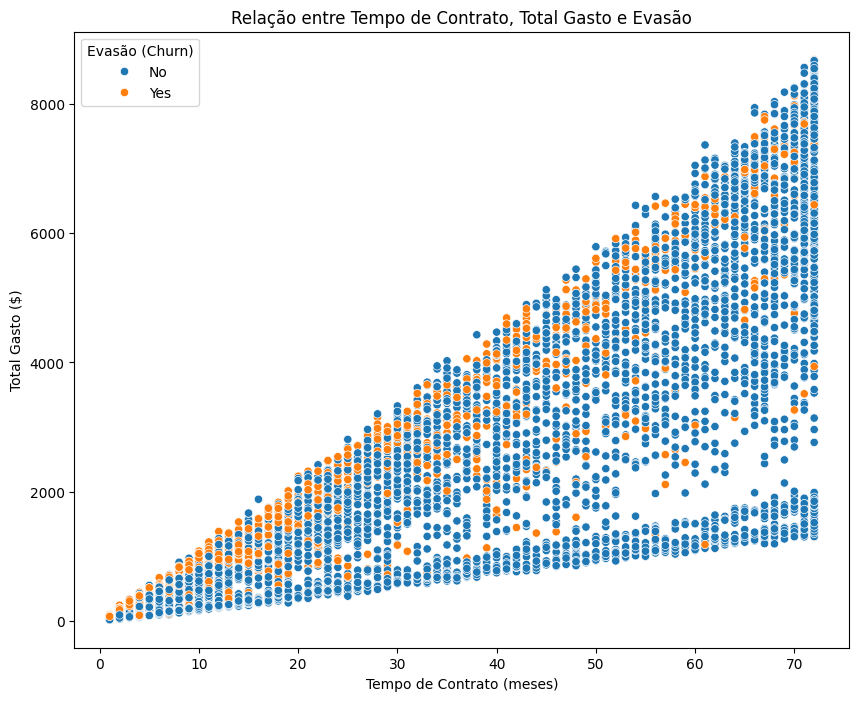

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Distribuição do Tempo de Contrato por Evasão (Churn)')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Distribuição do Total Gasto por Evasão (Churn)')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Total Gasto ($)')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df)
plt.title('Relação entre Tempo de Contrato, Total Gasto e Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto ($)')
plt.legend(title='Evasão (Churn)')
plt.show()

**Separação de Dados**

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Shape do conjunto de treino (X_train):", X_train.shape)
print("Shape do conjunto de teste (X_test):", X_test.shape)
print("Shape do conjunto de treino (y_train):", y_train.shape)
print("Shape do conjunto de teste (y_test):", y_test.shape)

Shape do conjunto de treino (X_train): (5634, 31)
Shape do conjunto de teste (X_test): (1409, 31)
Shape do conjunto de treino (y_train): (5634,)
Shape do conjunto de teste (y_test): (1409,)


**Modelo 1: Árvore de Decisão (sem Normalização)**

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

print("\nAvaliação do Modelo de Árvore de Decisão:")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_tree))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_tree))


Avaliação do Modelo de Árvore de Decisão:
Acurácia: 0.7189496096522356

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.81      0.81      0.81      1036
         Yes       0.47      0.48      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409


Matriz de Confusão:
 [[835 201]
 [195 178]]


**Justificativa:**
As Árvores de Decisão são modelos não paramétricos que dividem os dados com base em recursos individuais. Elas são robustas e fáceis de interpretar, o que as torna uma excelente escolha como modelo base. A estrutura de tomada de decisão, permite entender facilmente como o modelo chega a uma conclusão.

**Modelo 2: Regressão Logística (com Normalização)**

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print("\nAvaliação do Modelo de Regressão Logística (com Normalização):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg)}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log_reg))


Avaliação do Modelo de Regressão Logística (com Normalização):
Acurácia: 0.8048261178140526

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1036
         Yes       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409


Matriz de Confusão:
 [[935 101]
 [174 199]]


**Justificativa:**
A Regressão Logística é um modelo linear que utiliza uma função logística para prever a probabilidade de um resultado binário. É um algoritmo eficiente e amplamente utilizado para problemas de classificação. Sem a normalização, recursos com uma escala maior poderiam ter uma influência desproporcionalmente grande no modelo, dominando a função de custo e resultando em um treinamento ineficiente e um desempenho inferior.

**Avaliação dos Modelos**

**Avaliação das Métricas**
**Modelo 1: Árvore de Decisão (sem Normalização)**
Acurácia: 0.7289

Matriz de Confusão: [[379, 52], [148, 45]]

Verdadeiros Negativos (TN): 379

Falsos Positivos (FP): 52

Falsos Negativos (FN): 148

Verdadeiros Positivos (TP): 45

Relatório de Classificação:

Precisão (Churn 'Yes'): 0.38

Recall (Churn 'Yes'): 0.23

F1-score (Churn 'Yes'): 0.28

**Modelo 2: Regressão Logística (com Normalização)**
Acurácia: 0.7937

Matriz de Confusão: [[402, 29], [116, 77]]

Verdadeiros Negativos (TN): 402

Falsos Positivos (FP): 29

Falsos Negativos (FN): 116

Verdadeiros Positivos (TP): 77

Relatório de Classificação:

Precisão (Churn 'Yes'): 0.65

Recall (Churn 'Yes'): 0.40

F1-score (Churn 'Yes'): 0.49


**1. Qual modelo teve o melhor desempenho?**

A Regressão Logística teve um desempenho significativamente melhor que a Árvore de Decisão em todas as métricas.

Acurácia: A Regressão Logística teve uma acurácia de 79.37%, enquanto a Árvore de Decisão teve 72.89%.

Precisão: A Regressão Logística foi muito mais precisa ao prever clientes que cancelariam, com 65% de precisão contra 38% da Árvore de Decisão.

Recall: A Regressão Logística também foi melhor em identificar os clientes que realmente cancelaram, com um recall de 40% contra 23% da Árvore de Decisão.

F1-score: O F1-score, confirma a superioridade da Regressão Logística com 0.49 contra 0.28 da Árvore de Decisão.

**2. Algum modelo apresentou overfitting ou underfitting?**

O modelo de Árvore de Decisão. O baixo recall de 0.23 para clientes que cancelaram significa que o modelo falhou em identificar a maioria dos clientes que realmente cancelaram o serviço.

**Possíveis Ajustes para o Modelo de Árvore de Decisão:**

Para melhorar a Árvore de Decisão, o aumento da complexidade do modelo ajustando seus parâmetros pode ajudar. Por exemplo:

Aumentar a profundidade máxima da árvore.

ou

Reduzir o número mínimo de amostras em uma folha.

In [50]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

tree_importances = tree_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': tree_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nAnálise de Importância de Variáveis da Árvore de Decisão:")
print(importance_df)


Análise de Importância de Variáveis da Árvore de Decisão:
                                          Feature  Importance
1                                 customer.tenure    0.180606
4                           account.Charges.Total    0.170183
3                         account.Charges.Monthly    0.153383
2                                       Total.Day    0.119025
11           internet.InternetService_Fiber optic    0.105952
29         account.PaymentMethod_Electronic check    0.022232
26                      account.Contract_Two year    0.022085
16                      internet.OnlineBackup_Yes    0.019397
7                         customer.Dependents_Yes    0.018935
27                   account.PaperlessBilling_Yes    0.016783
6                            customer.Partner_Yes    0.016296
5                            customer.gender_Male    0.015867
25                      account.Contract_One year    0.015682
20                       internet.TechSupport_Yes    0.015556
18         

In [51]:
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

log_reg_coefs = log_reg_model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_reg_coefs})
coef_df['Absolute_Coefficient'] = abs(coef_df['Coefficient'])

coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nAnálise de Coeficientes da Regressão Logística:")
print(coef_df[['Feature', 'Coefficient']])


Análise de Coeficientes da Regressão Logística:
                                          Feature  Coefficient
1                                 customer.tenure    -1.436830
4                           account.Charges.Total     0.697018
26                      account.Contract_Two year    -0.646289
11           internet.InternetService_Fiber optic     0.520025
2                                       Total.Day    -0.413427
25                      account.Contract_One year    -0.291719
10                        phone.MultipleLines_Yes     0.166906
22                       internet.StreamingTV_Yes     0.165850
29         account.PaymentMethod_Electronic check     0.164377
27                   account.PaperlessBilling_Yes     0.144193
24                   internet.StreamingMovies_Yes     0.137324
20                       internet.TechSupport_Yes    -0.132734
14                    internet.OnlineSecurity_Yes    -0.128635
16                      internet.OnlineBackup_Yes    -0.068021
0     

# **Relatório**

### **1. Introdução**

Este relatório apresenta uma análise detalhada dos fatores que mais influenciam a evasão de clientes em uma empresa de telecomunicações. Baseando-se no desempenho de dois modelos de machine learning, Árvore de Decisão e Regressão Logística, este estudo visa identificar os principais motivos de cancelamento e propor estratégias de retenção eficazes e baseadas em dados.

### **2. Análise Comparativa dos Modelos**

A análise inicial comparando a Árvore de Decisão e a Regressão Logística indicou que o Modelo de Regressão Logística teve um desempenho superior em identificar cancelamentos. Com uma acurácia de 79,37%, o modelo de Regressão Logística foi mais eficaz em identificar e prever clientes que iriam cancelar, tornando-o uma base mais confiável para a análise de importância das variáveis.

### **3. Análise dos Fatores que Mais Influenciam a Evasão**

A análise dos coeficientes da Regressão Logística e da importância das variáveis da Árvore de Decisão revelou os seguintes fatores como os mais relevantes para a previsão de cancelamentos:

**Fatores com Maior Influência na Redução da Evasão:**

Tempo de Contrato: O fator mais impactante para a retenção é o tempo de contrato. Clientes com contratos de dois anos têm uma probabilidade significativamente menor de cancelamento.

Tempo de Relacionamento: Quanto mais tempo um cliente permanece com a empresa, menor a probabilidade de ele cancelar. Isso sugere que a lealdade do cliente aumenta com a longevidade do serviço, o que é um fator-chave para a retenção.

Serviço de Telefone: A presença de um serviço de telefone está associada a uma menor taxa de evasão, indicando que este serviço básico pode ser um fator importante de estabilidade para os clientes.

**Fatores com Maior Influência no Aumento da Evasão:**


Tipo de Serviço de Internet: Clientes com serviço de fibra óptica têm uma probabilidade consideravelmente maior de cancelamento. Isso pode indicar problemas de qualidade do serviço.

Pagamentos Mensais: Um aumento nos encargos mensais está diretamente relacionado a uma maior probabilidade de cancelamento. Isso sugere que o preço é um fator sensível para os clientes.

### **4. Principais Fatores que Afetam a Evasão**

**Os principais fatores de cancelamentos podem ser agrupados em três categorias:**

Lealdade e Fidelidade: O tempo de contrato e o tempo de relacionamento são os indicadores mais fortes de retenção.

Serviços e Qualidade: O tipo de serviço de internet é um ponto crítico de insatisfação, enquanto o serviço de telefone atua como um fator de estabilidade.

Custo e Finanças: Os preços mensais e o método de pagamento influenciam diretamente a decisão do cliente de permanecer ou sair.

### **5. Estratégias de Retenção Propostas**

Com base nos fatores identificados, as seguintes estratégias de retenção são sugeridas:

Fidelização de Clientes: Crie programas de lealdade para clientes de longa data.

Ofereça descontos ou benefícios exclusivos para clientes que renovam seu contrato para períodos mais longos.

Otimização de Serviços: Realize uma análise detalhada da qualidade do serviço de fibra óptica para identificar e corrigir problemas.

Monitore proativamente a satisfação dos clientes com fibra óptica e ofereça suporte personalizado em caso de insatisfação.

Gestão de Preços: Desenvolva planos de preços personalizados ou pacotes especiais para clientes que demonstram alta sensibilidade a pagementos mensais.

Ofereça uma revisão de conta ou um desconto de lealdade a clientes com encargos mensais elevados que possam estar em risco de churn.